Here’s a Qiskit implementation to verify if a binary number is a palindrome using quantum gates. The algorithm compares pairs of bits symmetrically and flags a result qubit if all pairs match.

In [17]:
import qiskit
print(qiskit.version.get_version_info())

C:\Users\slipo\anaconda3\envs\old_qiskit\lib\site-packages\qiskit\circuit\equivalence.py:18: DeprecationWarning: The retworkx package is deprecated and has been renamed to rustworkx. Rustworkx is a drop-in replacement and can be used by replacing `import retworkx` with import `rustworkx`. 
  import retworkx as rx
C:\Users\slipo\anaconda3\envs\old_qiskit\lib\site-packages\qiskit\version.py:20: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


0.18.1


In [18]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import matplotlib.pyplot as plt

def create_palindrome_circuit(binary_str):
    n = len(binary_str)
    num_pairs = n // 2  # Number of bit pairs to compare
    
    # Quantum registers
    input_reg = QuantumRegister(n, 'input')  # Input bits
    ancilla = QuantumRegister(num_pairs, 'ancilla')  # Comparison results
    result = QuantumRegister(1, 'result')  # Final answer (1 = palindrome)
    cr = ClassicalRegister(1, 'cr')  # Classical register for measurement
    
    qc = QuantumCircuit(input_reg, ancilla, result, cr)
    
    # Step 1: Initialize input qubits to the given binary number
    for i, bit in enumerate(binary_str):
        if bit == '1':
            qc.x(input_reg[i])
    
    # Step 2: Compare symmetric bit pairs (e.g., first and last bit)
    for i in range(num_pairs):
        left = i
        right = n - 1 - i
        
        # XOR each pair into ancilla qubits (ancilla=0 if bits match)
        qc.cx(input_reg[left], ancilla[i])
        qc.cx(input_reg[right], ancilla[i])
    
    # Step 3: Check if all ancillas are 0 (i.e., all pairs matched)
    qc.x(ancilla)  # Invert ancillas (now 1 means "valid pair")
    qc.mcx(ancilla, result)  # Flip result qubit if ALL ancillas are 1
    qc.x(ancilla)  # Revert ancillas to original state
    
    # Step 4: Measure the result
    qc.measure(result, cr)

    return qc

def run_palindrome_circuit(binary_number):
    qc = create_palindrome_circuit(binary_number)
    qc.draw(output='mpl', fold=100)

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, simulator, shots=1024).result()
    counts = result.get_counts()

    print(f"Results for binary number '{binary_number}':", counts)
    if '1' in counts:
        print("✅ The number is a palindrome!")
    else:
        print("❌ The number is NOT a palindrome.")

Here's a Python classical code snippet that checks whether a given graph is symmetric. We use the networkx library to represent the graph and perform the symmetry check.
- We define a function is_symmetric that takes a graph as input and checks if it is symmetric.
- The function first checks if the graph is undirected. If it is directed, it returns False.
- If the graph is undirected, it retrieves the adjacency matrix of the graph and checks if the matrix is symmetric by comparing it to its transpose.
- We create two example graphs: one symmetric and one non-symmetric, and use is_symmetric function to check their symmetry.

In [1]:
import networkx as nx

def is_symmetric(graph):
    # Check if the graph is undirected
    if not graph.is_directed():
        # Get the adjacency matrix of the graph
        adj_matrix = nx.adjacency_matrix(graph).todense()
        # Check if the adjacency matrix is symmetric
        return (adj_matrix == adj_matrix.T).all()
    else:
        return False

# Example usage
# Create a symmetric graph
symmetric_graph = nx.Graph()
symmetric_graph.add_edges_from([(1, 2), (2, 3), (3, 1)])

# Create a non-symmetric graph
non_symmetric_graph = nx.DiGraph()
non_symmetric_graph.add_edges_from([(1, 2), (2, 3), (3, 1)])

print("Is symmetric_graph symmetric?", is_symmetric(symmetric_graph))  # Output: True
print("Is non_symmetric_graph symmetric?", is_symmetric(non_symmetric_graph))  # Output: False

Is symmetric_graph symmetric? True
Is non_symmetric_graph symmetric? False


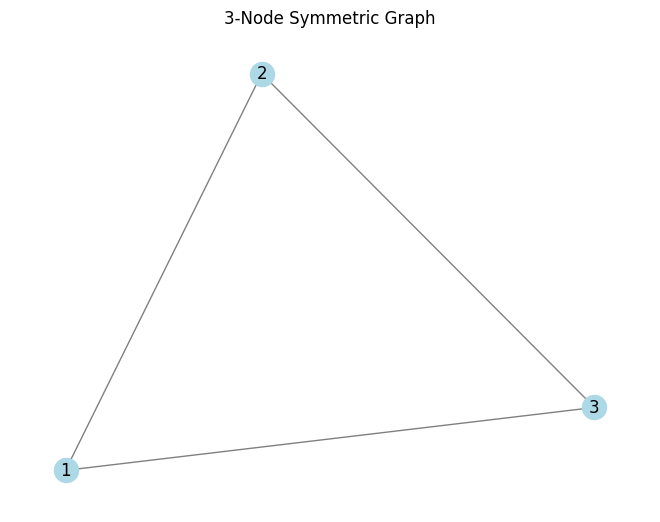

In [2]:
import matplotlib.pyplot as plt

# Draw the graph
pos = nx.spring_layout(symmetric_graph)
nx.draw(symmetric_graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("3-Node Symmetric Graph")
plt.show()

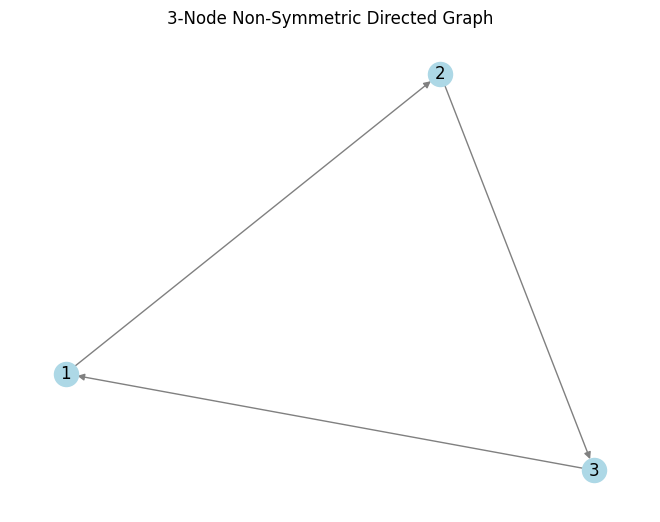

In [3]:
# Draw the graph
pos = nx.spring_layout(non_symmetric_graph)
nx.draw(non_symmetric_graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("3-Node Non-Symmetric Directed Graph")
plt.show()

## Quantum Code Testing

Results for binary number '101': {'1': 1024}
✅ The number is a palindrome!


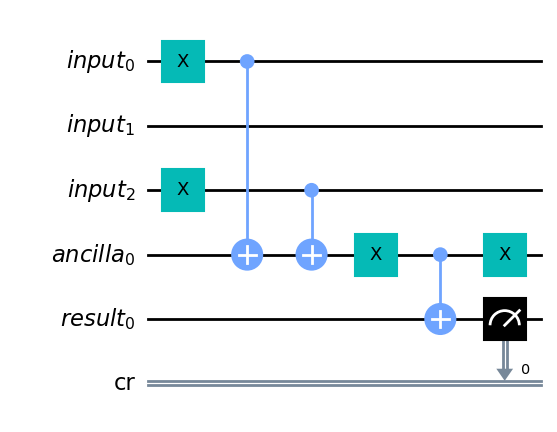

In [10]:
binary_number = '101' # Test this binary number (palindrome = True)
run_palindrome_circuit(binary_number)

Results for binary number '11011': {'1': 1024}
✅ The number is a palindrome!


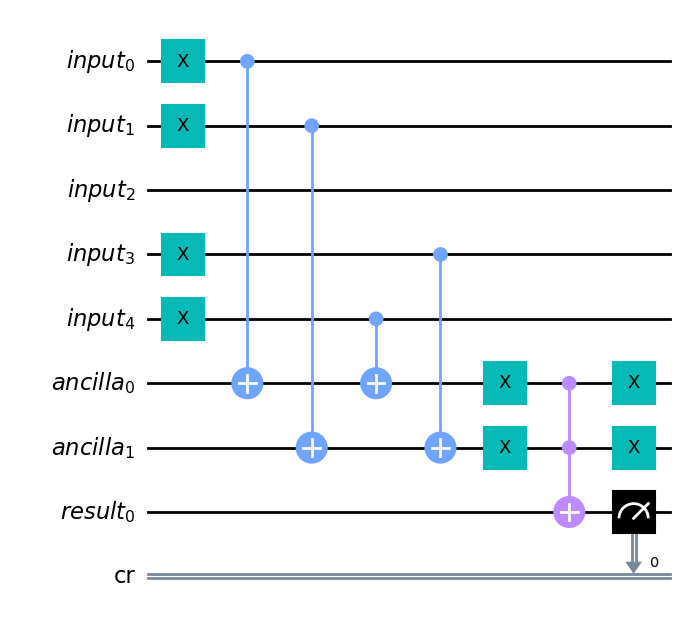

In [11]:
binary_number = '11011' # Test this binary number (palindrome = True)
run_palindrome_circuit(binary_number)

This code generates a random palindrome binary string of the specified length n. It first creates the first half of the palindrome and then mirrors it to form the full palindrome. If n is even, the first half is mirrored directly; if n is odd, the middle element is not repeated in the second half. You can adjust the value of n to generate palindromes of different lengths.

In [16]:
import random

def generate_palindrome_binary_string(n):
    if n & n <= 0:
        return ""
    
    # Generate the first half of the palindrome
    half_length = (n + 1) // 2
    first_half = [random.choice(['0', '1']) for _ in range(half_length)]
    
    # Create the full palindrome
    if n % 2 == 0:
        palindrome = first_half + first_half[::-1]
    else:
        palindrome = first_half + first_half[-2::-1]
    
    return ''.join(palindrome)

# Example usage
n = 10
palindrome_binary_string = generate_palindrome_binary_string(n)
print(f"Random palindrome binary string of length {n}: {palindrome_binary_string}")

Random palindrome binary string of length 10: 1000110001


Results for binary number '1000110001': {'1': 1024}
✅ The number is a palindrome!


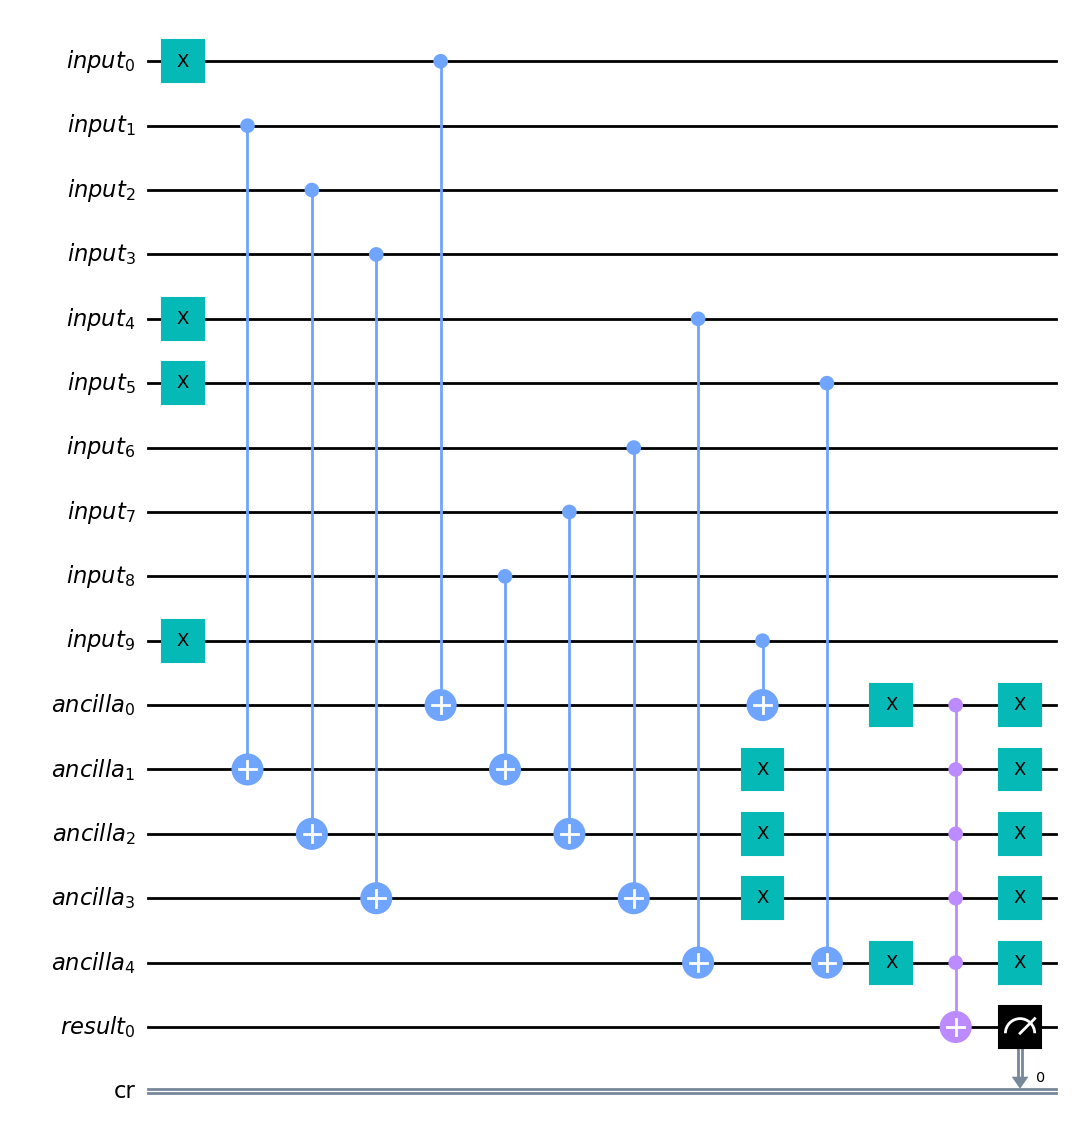

In [17]:
binary_number = '1000110001' # Test this binary number (palindrome = True)
run_palindrome_circuit(binary_number)

Random palindrome binary string of length 15: 110000111000011
Results for binary number '110000111000011': {'1': 1024}
✅ The number is a palindrome!


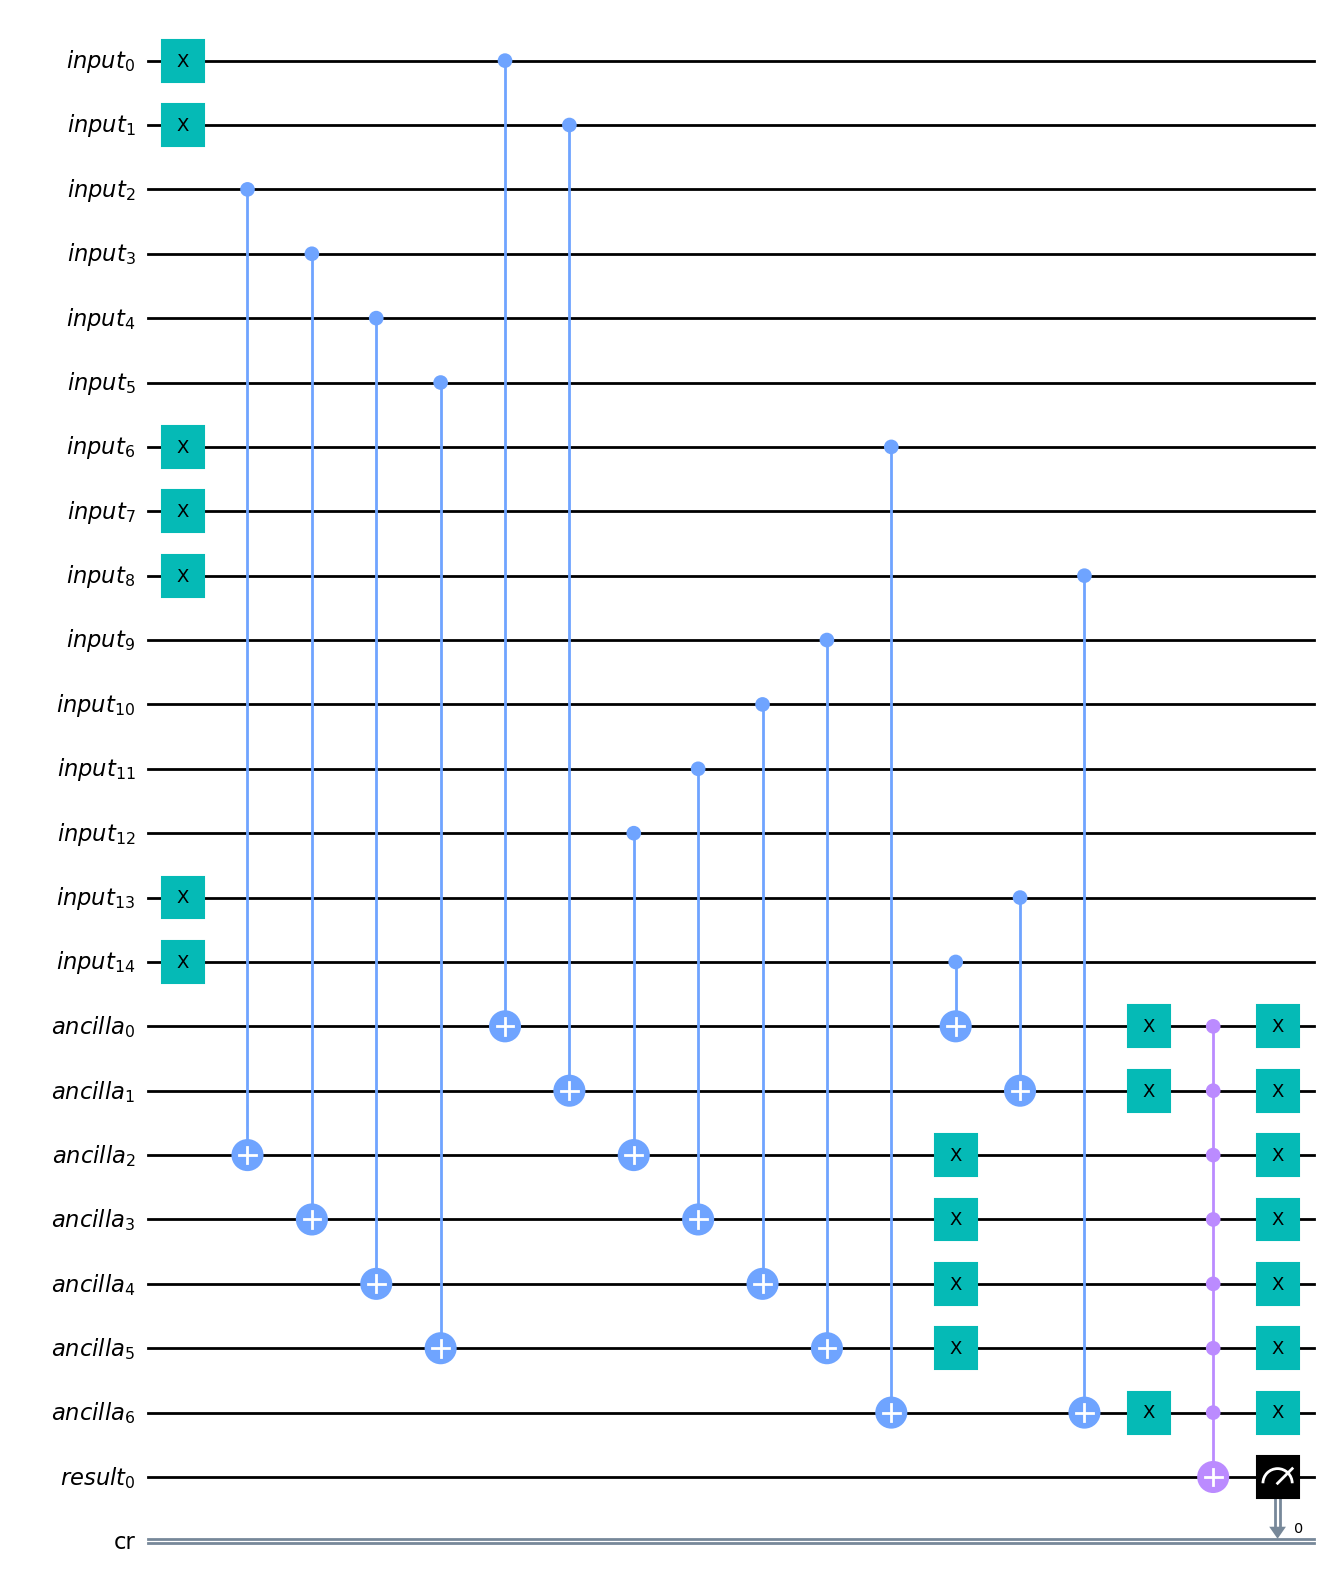

In [18]:
n = 15
palindrome_binary_string = generate_palindrome_binary_string(n)
print(f"Random palindrome binary string of length {n}: {palindrome_binary_string}")

run_palindrome_circuit(palindrome_binary_string)

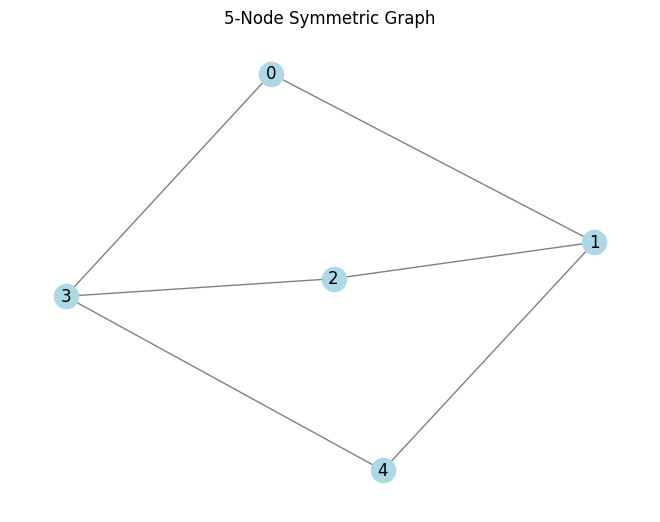

Is the graph symmetric? True


In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
adj_matrix = np.array([
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [0, 1, 0, 1, 0]
])

# Create the graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("5-Node Symmetric Graph")
plt.show()

print("Is the graph symmetric?",is_symmetric(G))

In [34]:
binary_string = ''.join(map(str, adj_matrix.flatten()))
binary_string

'0101010101010101010101010'

QiskitError: 'ERROR:  [Experiment 0] QasmSimulator: Insufficient memory for 37-qubit circuit using "statevector" method. You could try using the "matrix_product_state" or "extended_stabilizer" method instead. ,  ERROR: QasmSimulator: Insufficient memory for 37-qubit circuit using "statevector" method. You could try using the "matrix_product_state" or "extended_stabilizer" method instead.'

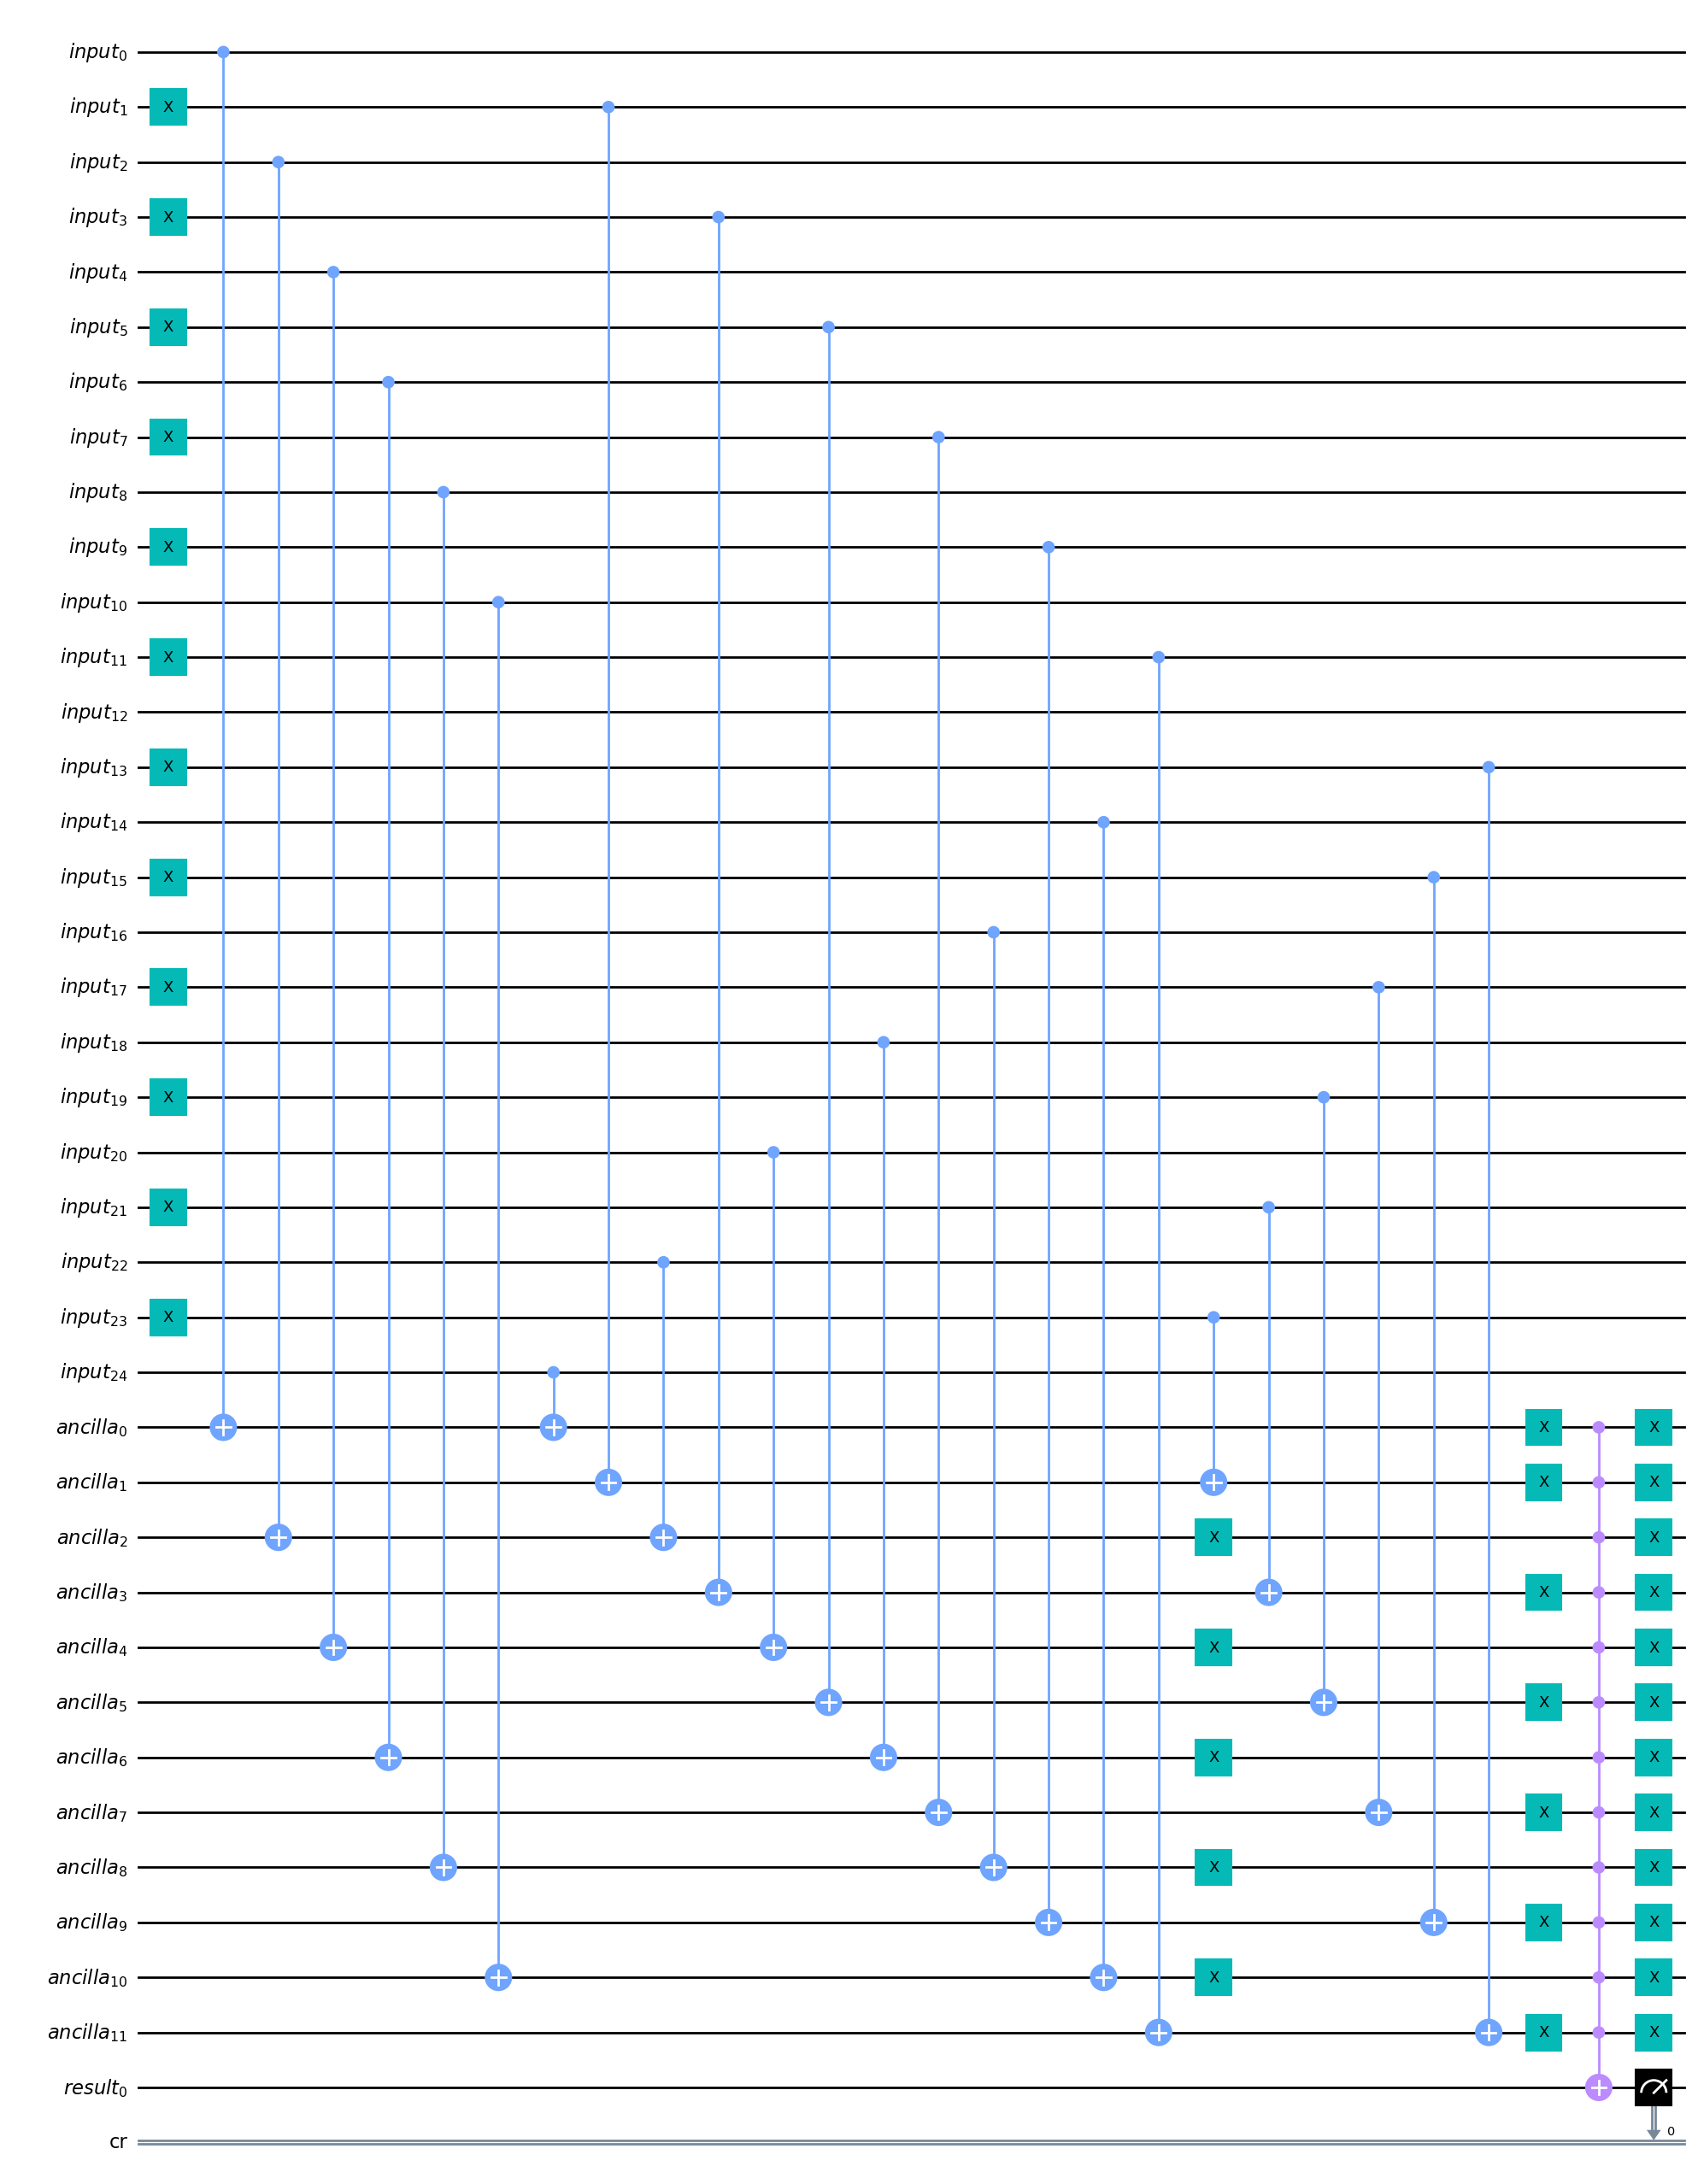

In [35]:
run_palindrome_circuit(binary_string)

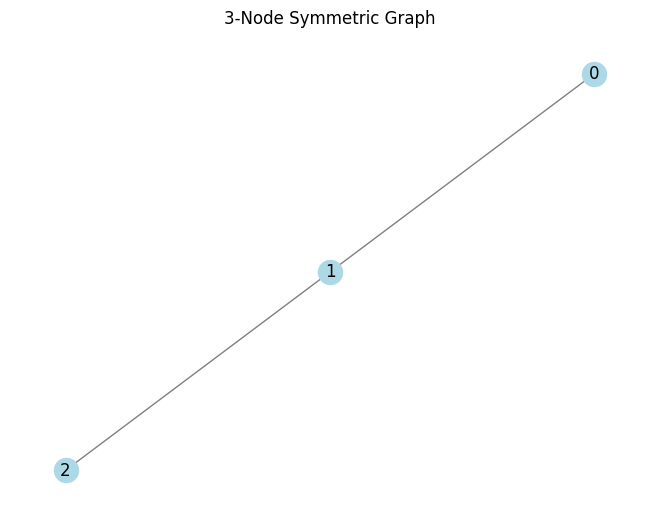

Is the graph symmetric? True


In [10]:
# Define the adjacency matrix
adj_matrix = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
])

# Create the graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("3-Node Symmetric Graph")
plt.show()

print("Is the graph symmetric?",is_symmetric(G))

In [37]:
binary_string = ''.join(map(str, adj_matrix.flatten()))
binary_string

'010101010'

Results for binary number '010101010': {'1': 1024}
✅ The number is a palindrome!


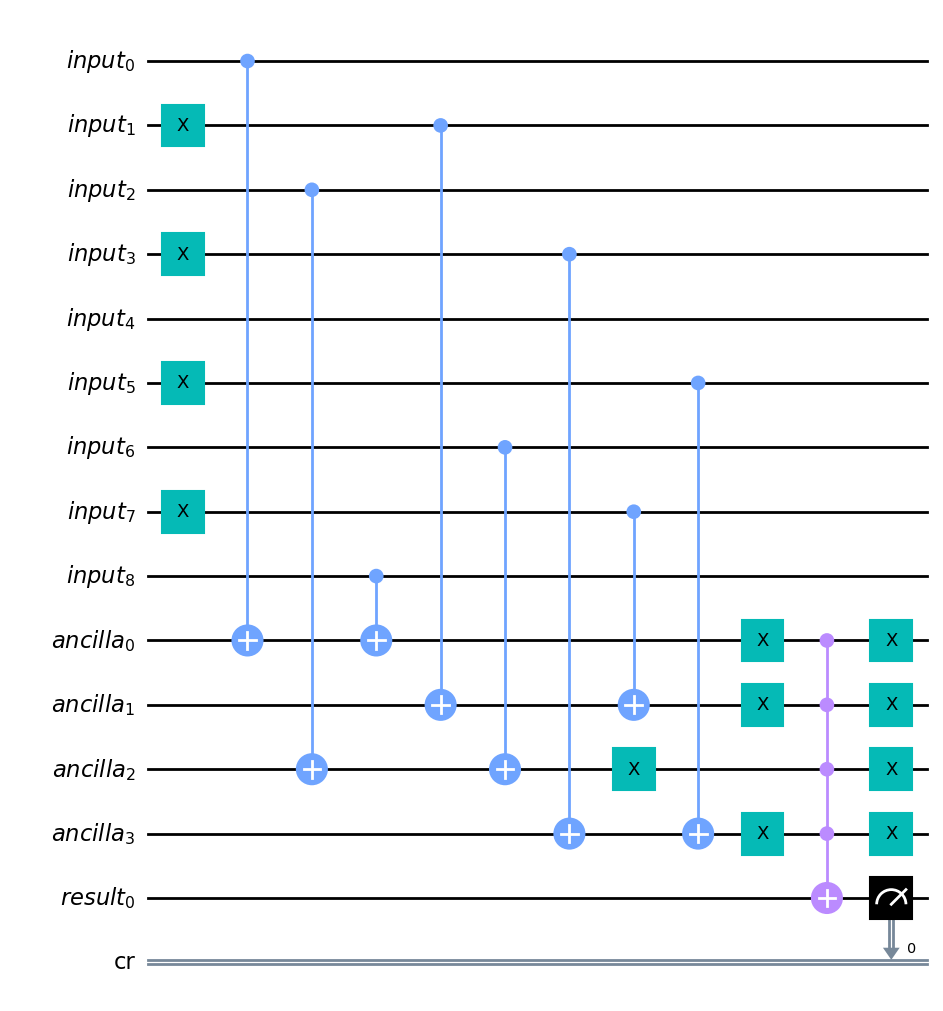

In [38]:
run_palindrome_circuit(binary_string)

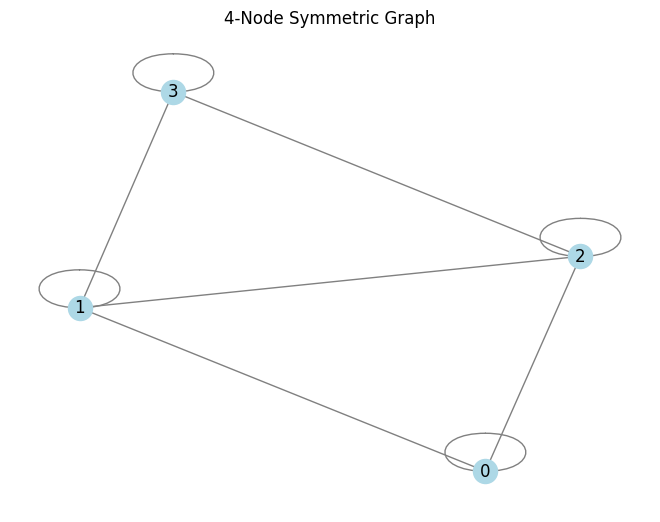

Is the graph symmetric? True


In [11]:
# Define the adjacency matrix
adj_matrix = np.array([
    [1, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 1, 1]
])

# Create the graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("4-Node Symmetric Graph")
plt.show()

print("Is the graph symmetric?",is_symmetric(G))

Results for binary number '1110011111100111': {'1': 1024}
✅ The number is a palindrome!


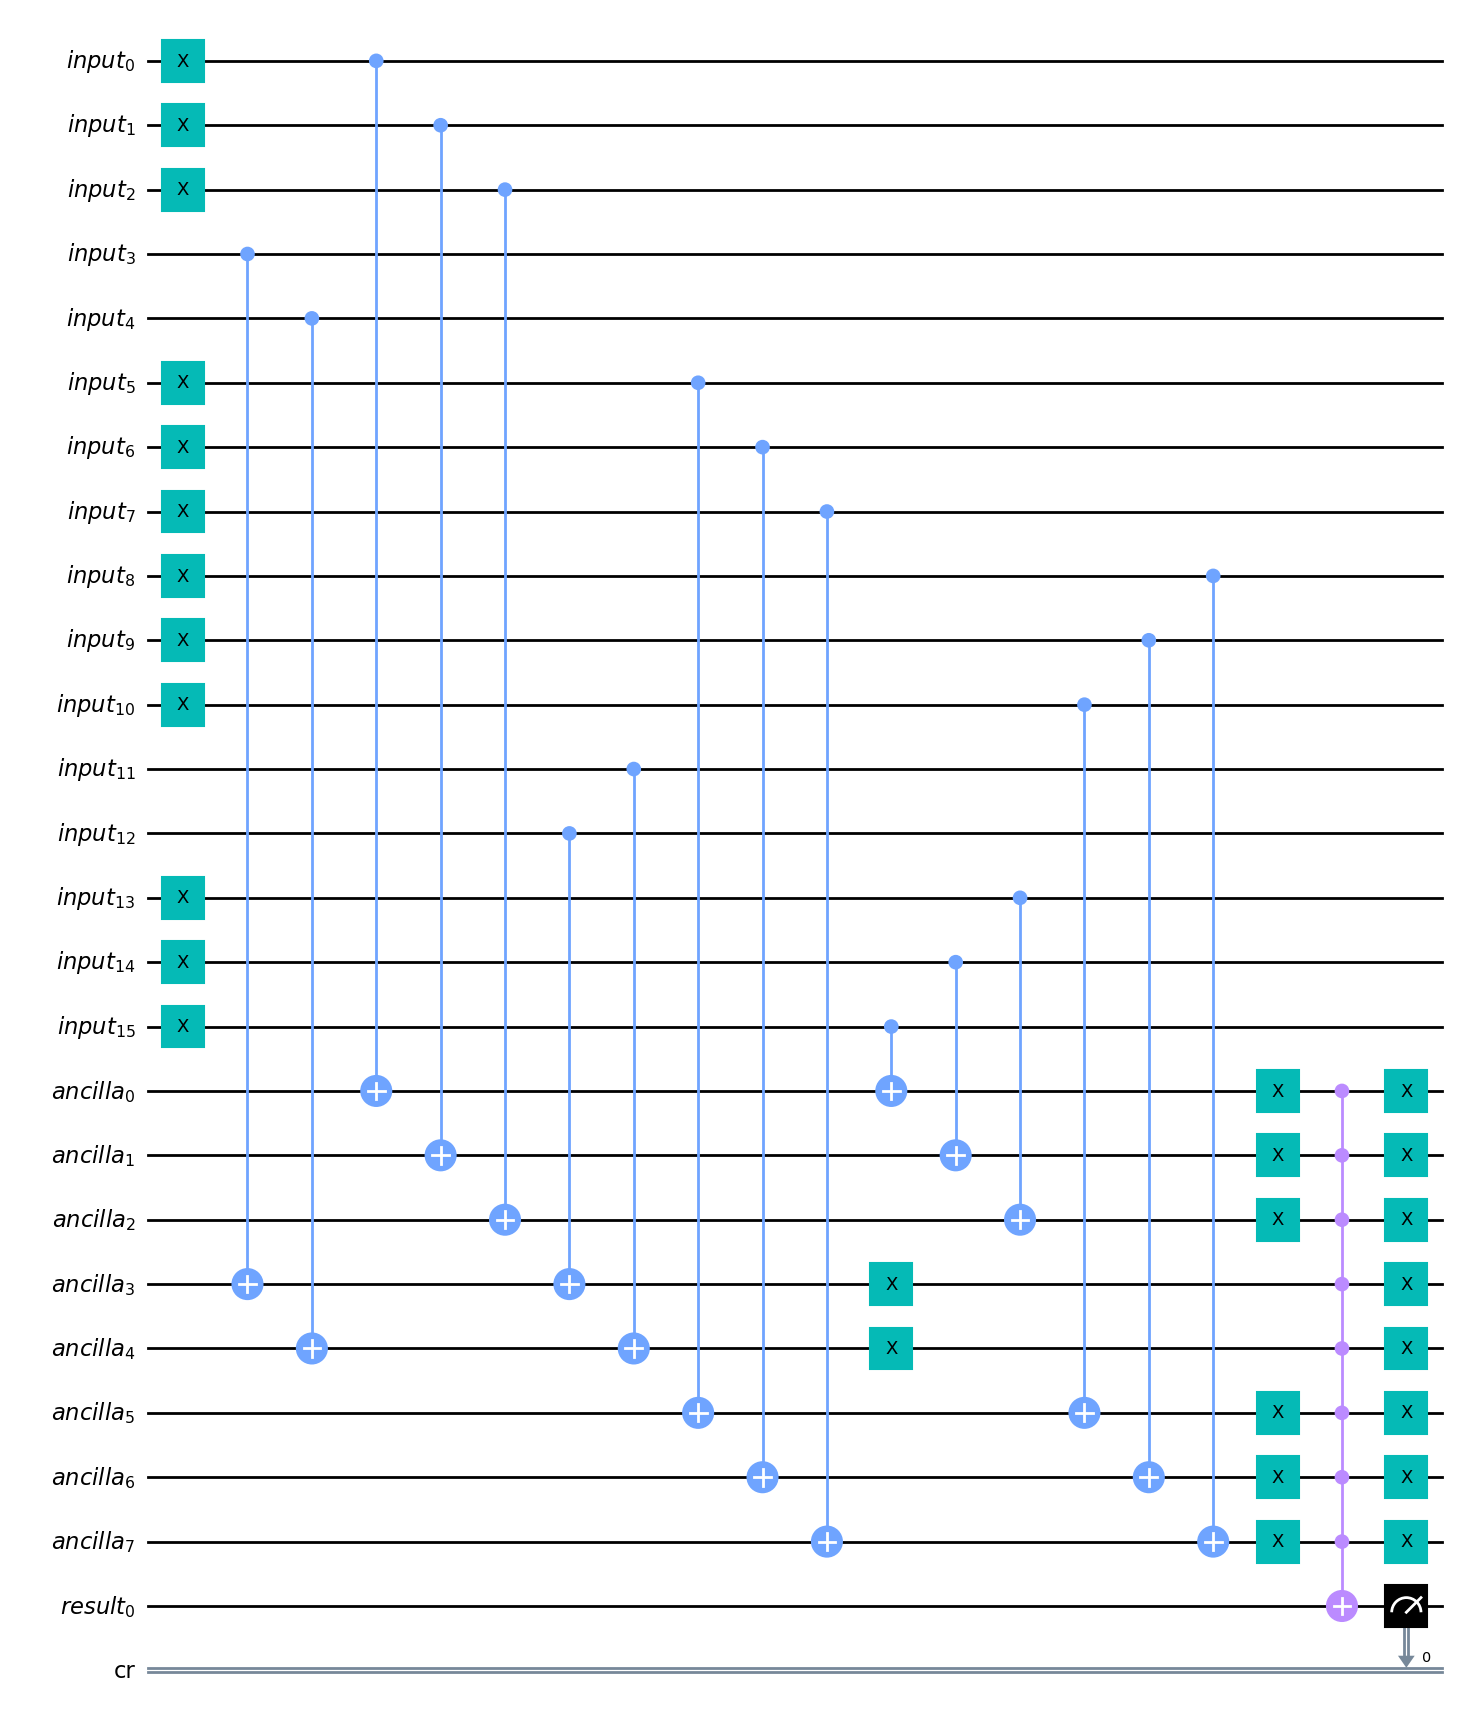

In [44]:
binary_string = ''.join(map(str, adj_matrix.flatten()))
run_palindrome_circuit(binary_string)

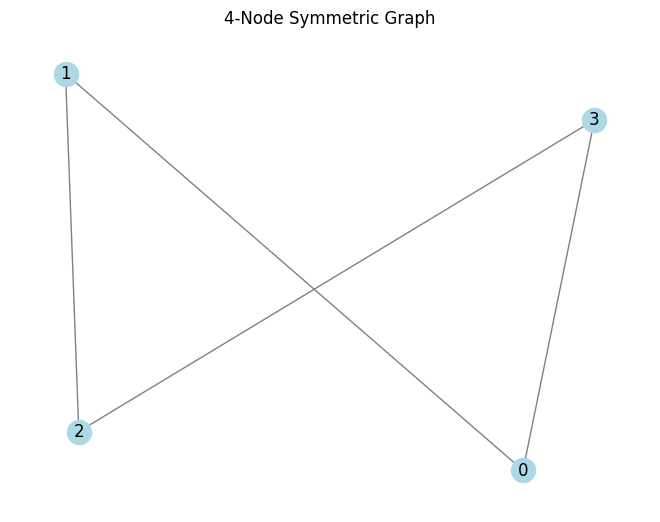

Is the graph symmetric? True


In [12]:
# Define the adjacency matrix
#•	A to B
#•	B to C
#•	C to D
#•	D to A
adj_matrix = np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0]
])

# Create the graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("4-Node Symmetric Graph")
plt.show()

print("Is the graph symmetric?",is_symmetric(G))

Results for binary number '0101101001011010': {'1': 1024}
✅ The number is a palindrome!


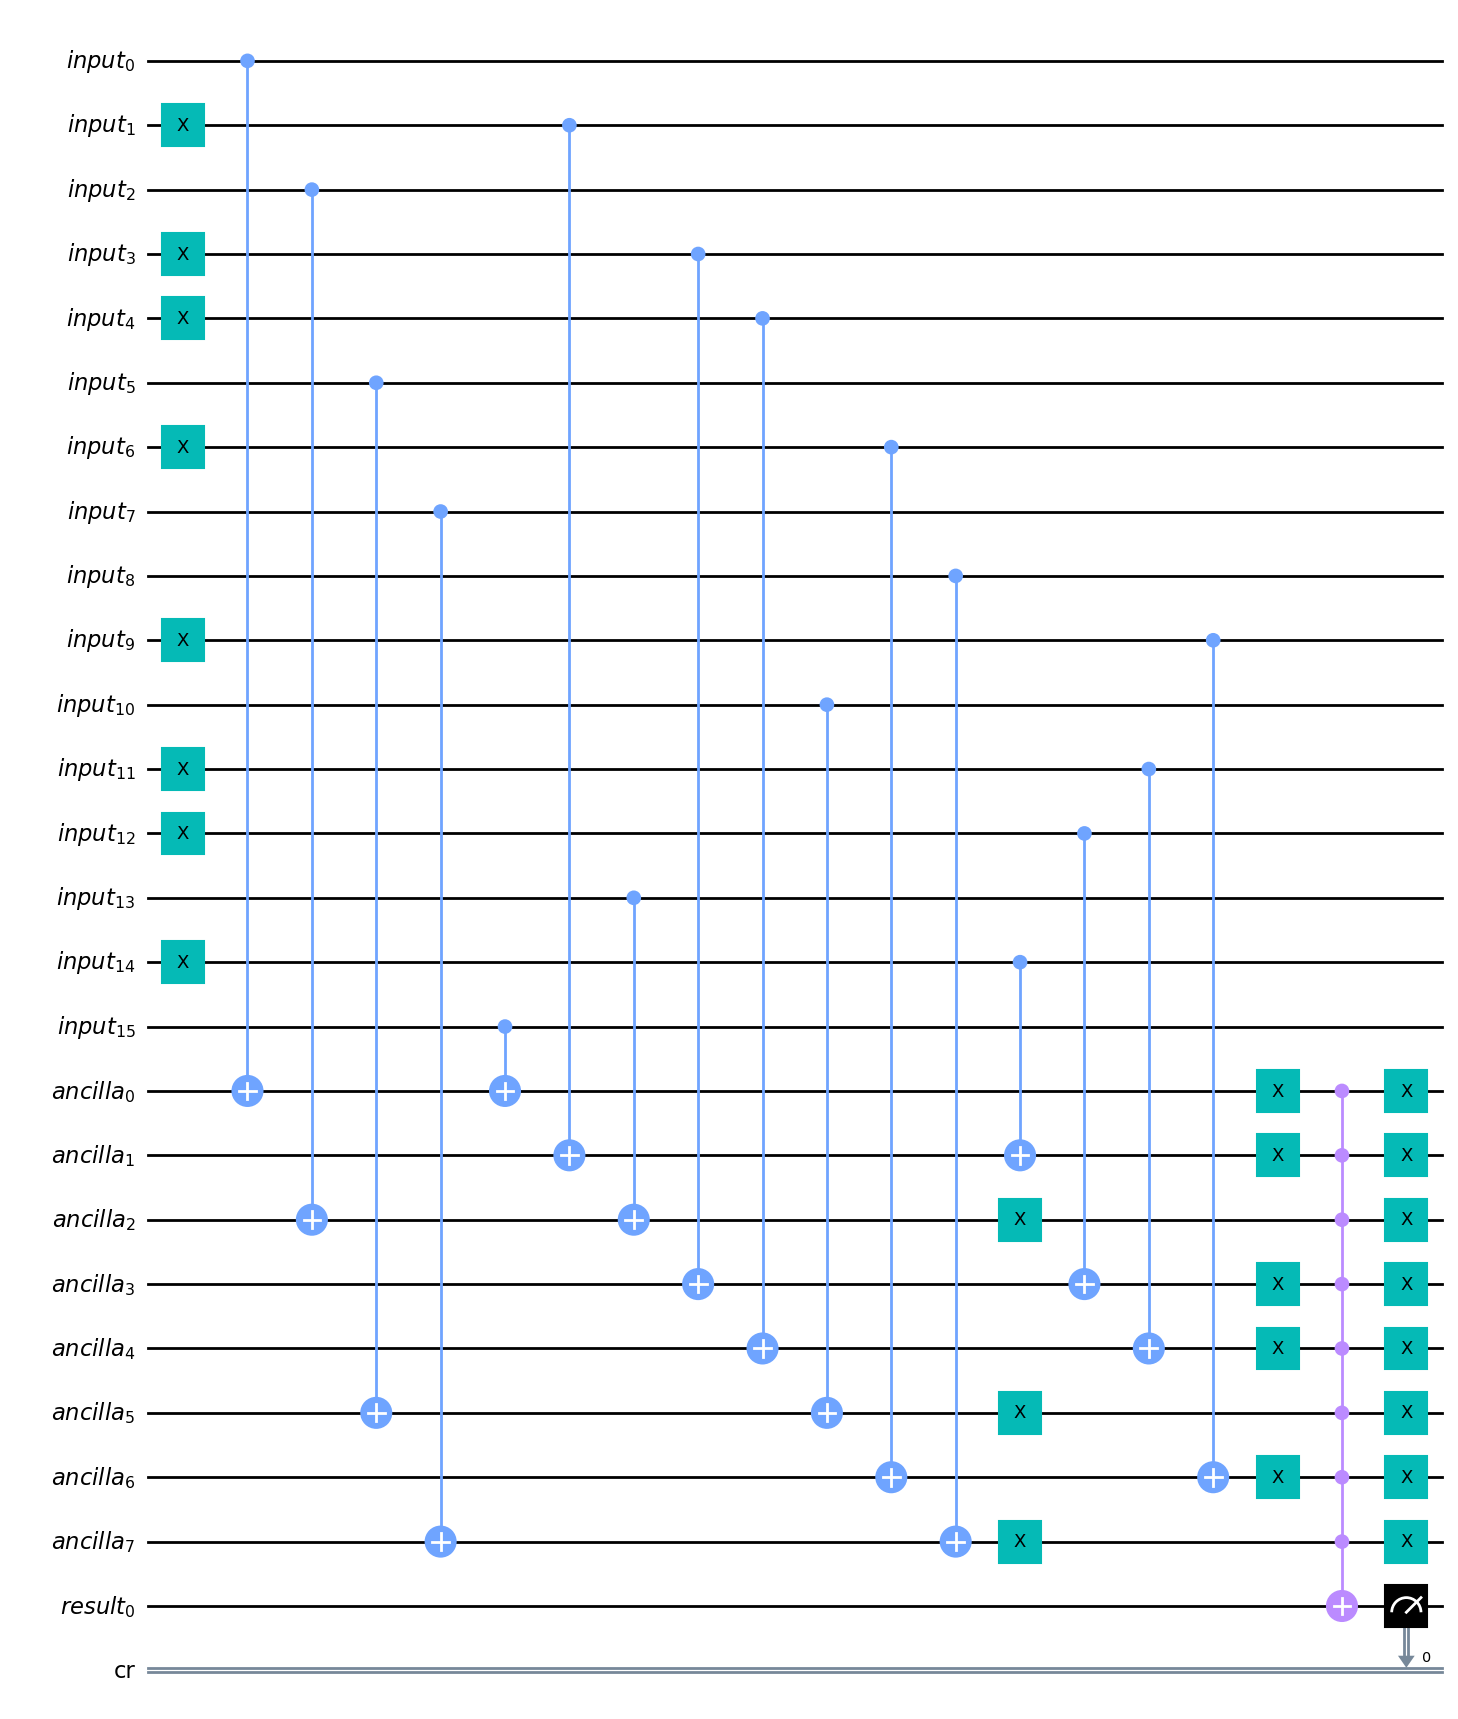

In [49]:
binary_string = ''.join(map(str, adj_matrix.flatten()))
run_palindrome_circuit(binary_string)

Python code to create a random symmetric matrix of a specified size with 0's and 1's:

In [13]:
import numpy as np

def create_random_symmetric_matrix(size):
    # Create a random matrix with 0's and 1's
    matrix = np.random.randint(2, size=(size, size))
    
    # Make the matrix symmetric
    symmetric_matrix = (matrix + matrix.T) // 2
    
    return symmetric_matrix

# Example usage
size = 5  # Specify the size of the matrix
symmetric_matrix = create_random_symmetric_matrix(size)
print(symmetric_matrix)

[[0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 1 1 0 0]]


In [20]:
binary_string = ''.join(map(str, symmetric_matrix.flatten()))
binary_string # not a palindrome!

'0000000001000010000001100'

In [21]:
symmetric_graph = nx.Graph()
symmetric_graph.add_edges_from([(1, 2), (2, 3), (3, 1)])
adj_matrix = nx.adjacency_matrix(symmetric_graph).todense()
print(adj_matrix)

[[0 1 1]
 [1 0 1]
 [1 1 0]]


Results for binary number '011101110': {'1': 1024}
✅ The number is a palindrome!


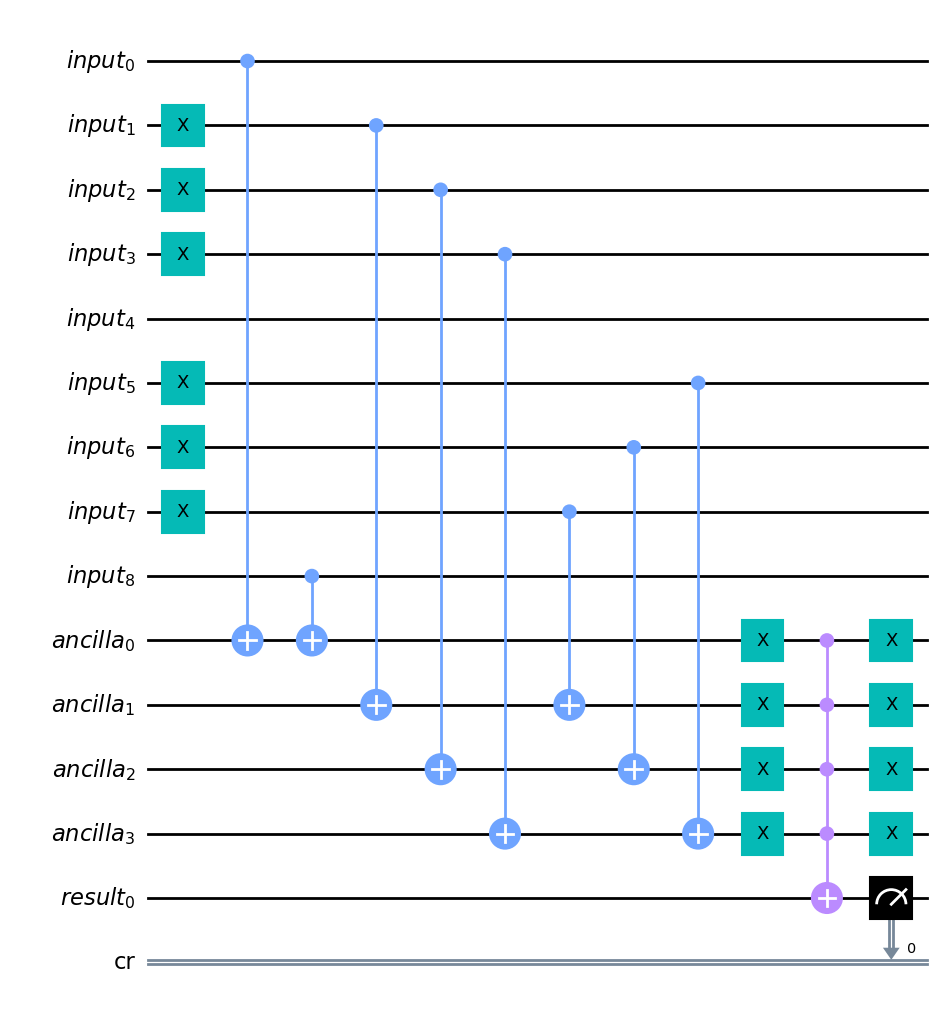

In [22]:
binary_string = ''.join(map(str, adj_matrix.flatten()))
run_palindrome_circuit(binary_string)

In [23]:
# Create a non-symmetric graph
non_symmetric_graph = nx.DiGraph()
non_symmetric_graph.add_edges_from([(1, 2), (2, 3), (3, 1)])
adj_matrix = nx.adjacency_matrix(non_symmetric_graph).todense()
print(adj_matrix)

[[0 1 0]
 [0 0 1]
 [1 0 0]]


Results for binary number '010001100': {'0': 1024}
❌ The number is NOT a palindrome.


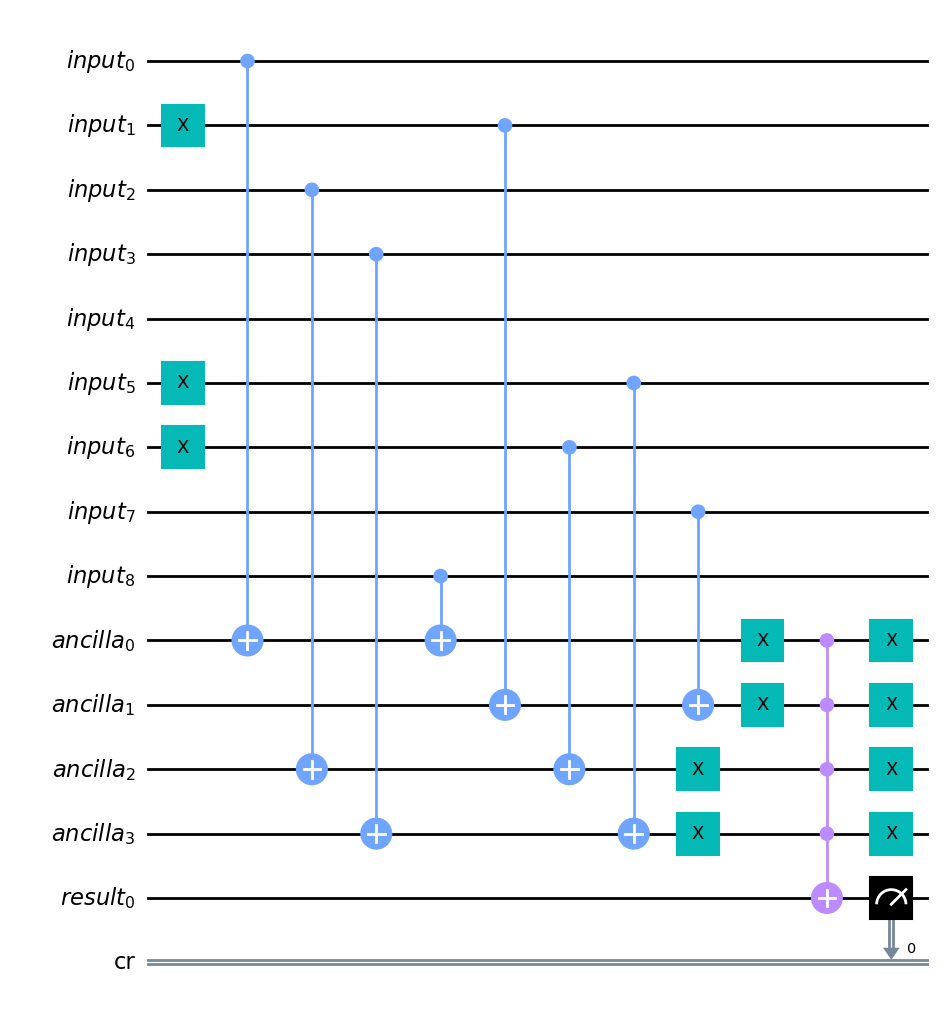

In [24]:
binary_string = ''.join(map(str, adj_matrix.flatten()))
run_palindrome_circuit(binary_string)